## Подключение библеотек

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy as sc

## Чтение файла и подготовка данных

In [2]:
df = pd.read_excel('C:/Users/Админ/OneDrive/Рабочий стол/Работы/матиматическая статистика/Студ весна.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   КР      70 non-null     int64
 1   РГР     70 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [4]:
data_1 = df['КР'].value_counts()

In [5]:
data_2 = df['РГР'].value_counts()

## Анализ

Построение круговых диаграм

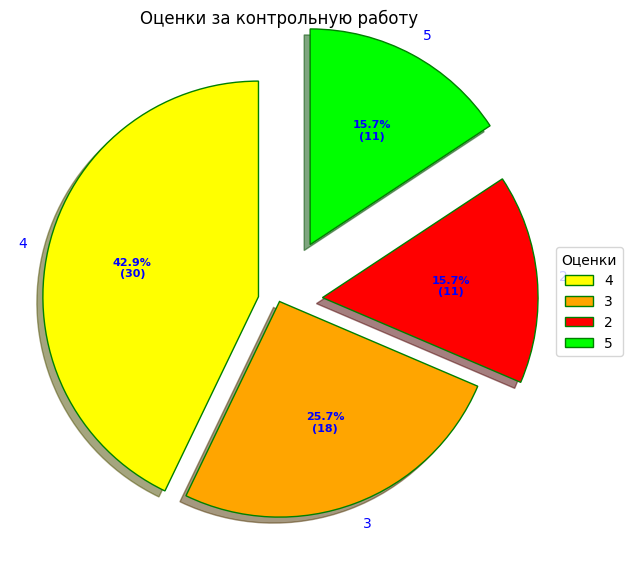

In [6]:
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3)
 
# Creating color parameters
colors = ( "yellow", "orange", "red",
          "lime")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data_1,
                                  autopct = lambda pct: func(pct, data_1),
                                  explode = explode,
                                  labels = data_1.index,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="blue"))
 
# Adding legend
ax.legend(wedges, data_1.index,
          title ="Оценки",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Оценки за контрольную работу")
 
# show plot
plt.show()

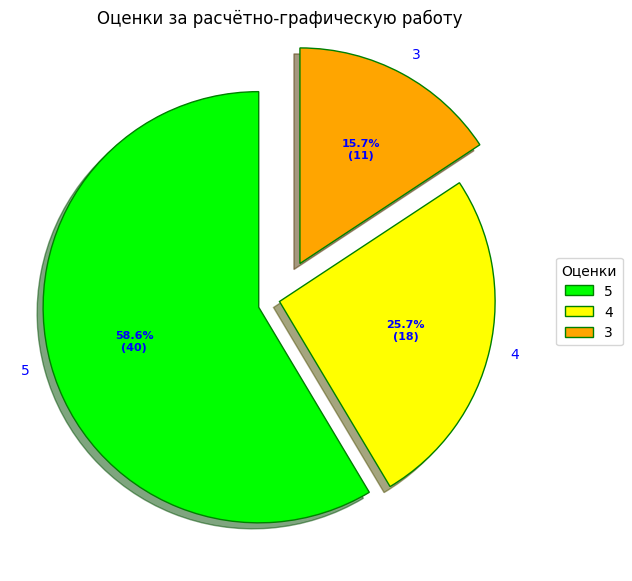

In [7]:
# Creating explode data
explode = (0.1, 0.0, 0.2)
 
# Creating color parameters
colors = ( "lime", "yellow",
          "orange")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data_2,
                                  autopct = lambda pct: func(pct, data_2),
                                  explode = explode,
                                  labels = data_2.index,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="blue"))
 
# Adding legend
ax.legend(wedges, data_2.index,
          title ="Оценки",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Оценки за расчётно-графическую работу")
 
# show plot
plt.show()

Как следуют из диаграмм. РГР пишут лучше по сравненю с КР. Так ещё и без двоик.

Посчтиаем дисперсии для 2 выборок

In [8]:
print('Дисперсия выборки КР:', np.var(df['КР'].values))
print('Дисперсия выборки РГР:', np.var(df['РГР'].values))

Дисперсия выборки КР: 0.8712244897959183
Дисперсия выборки РГР: 0.5591836734693875


Для того что проверить равны ли наши дисперсии воспользуемся критериями Фишера и проведем F-тест. Зададим $a$ = 0.05

F-тест используется для проверки равенства двух дисперсий совокупности. Нулевая и альтернативная гипотезы для теста следующие:

H 0 : $σ$ 1 2 = $σ$ 2 2 (дисперсии равны)

H 1 : $σ$ 1 2 ≠ $σ$ 2 2 (дисперсии не равны)

In [17]:
def f_test(x, y):
    f = np.var(x, ddof=1)/np.var(y, ddof=1) 
    dfn = x.size-1 
    dfd = y.size-1 
    p = 1-sc.stats.f.cdf(f, dfn, dfd)  
    return f, p

In [19]:
f = f_test(df['КР'].values, df['РГР'].values)

print('Статистика F-теста равна:', round(f[0], 4))
print('Значение P равно:', round(f[1], 4))

Статистика F-теста равна: 1.558
Значение P равно: 0.0338


Поскольку это p-значение меньше 0,05, мы отвергаем нулевую гипотезу. Это означает, что у нас есть достаточно доказательств, чтобы сказать, что две дисперсии генеральной совокупности не равны.

Теперь выполним t-тест

T-тест – это тест, который сравнивает два средних значения, и сообщает нам, отличаются они друг от друга или нет. T-тест также известен как T-тест Стьюдента, и он также показывает, насколько значительны различия. Другими словами, это дает нам представление о том, могли ли эти различия возникнуть случайно

 H 0 : µ 1 = µ 2 (две средние совокупности равны)
 
 H 1 : µ 1 ≠ µ 2 (две средние совокупности не равны)

In [20]:
dov_int = sc.stats.ttest_ind(df['КР'].values, df['РГР'].values, equal_var=False)

print('Статистика t-теста равна', abs(dov_int.statistic))
print('Двустороннее значение P равно', dov_int.pvalue)

Статистика t-теста равна 5.853943507325608
Двустороннее значение P равно 3.614194654333273e-08


Поскольку p-значение нашего теста (3,614 * 10^(-8)) меньше, чем альфа = 0,05, мы отвергаем нулевую гипотезу теста. У нас достаточно данных, чтобы сказать, что средняя высота растений между двумя популяциями различна